In [7]:
import numpy as np
import pandas as pd
from K_Means import K_Means
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
warnings.filterwarnings('ignore')

# Iris


In [8]:
iris = pd.read_csv('datasets/iris.csv')
iris_no_species = pd.read_csv('datasets/iris_no_species.csv')

In [9]:
def normalize_df(df: pd.DataFrame, columns: [str]) -> pd.DataFrame:
    for c in columns:
        min_value = df[c].min()
        max_value = df[c].max()

        df[c] = (df[c] - min_value)/(max_value - min_value)
    return df

In [10]:
iris_no_species = normalize_df(iris_no_species, iris_no_species.columns)

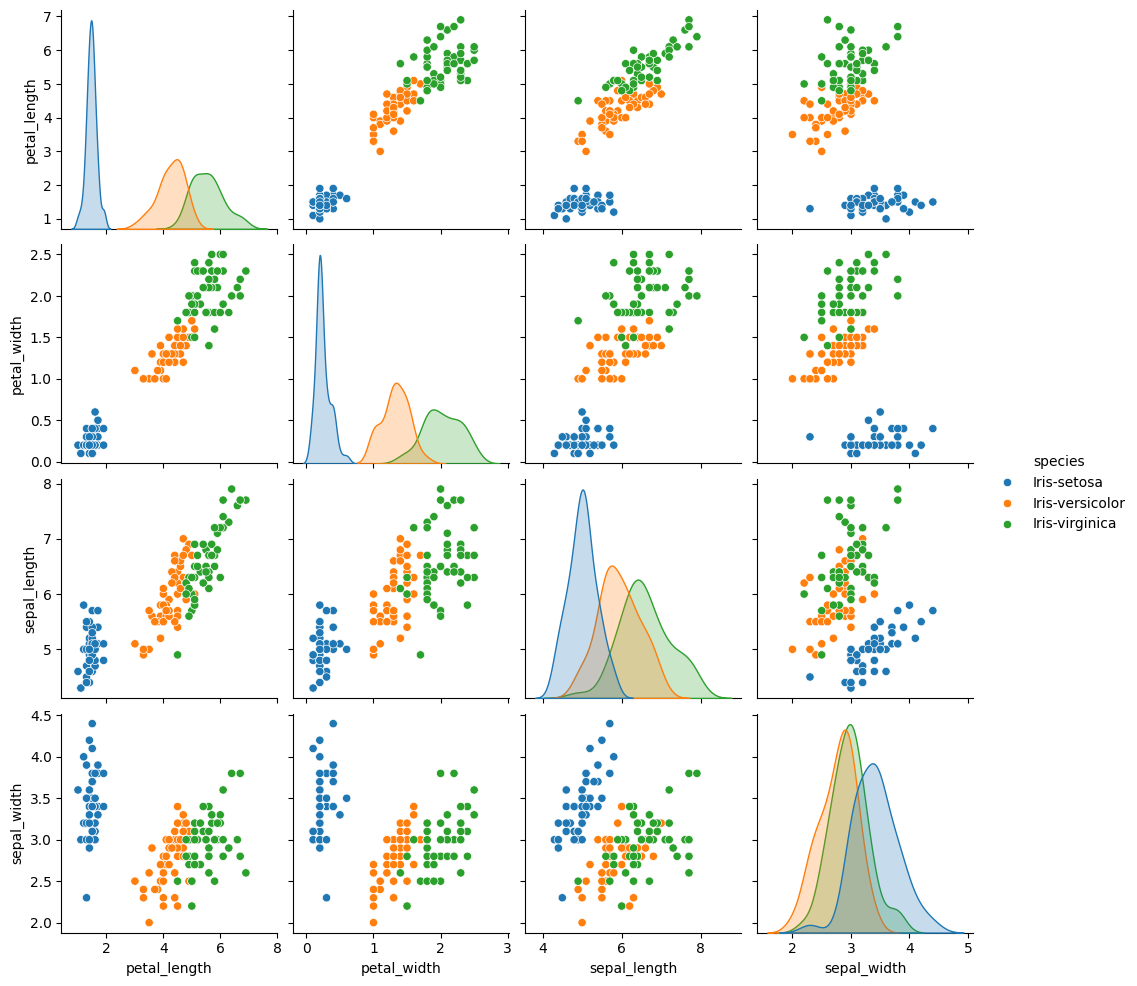

In [11]:
sns.pairplot(iris[sorted(iris.columns)], hue='species')
plt.show()

Convergence reached in 37 iterations


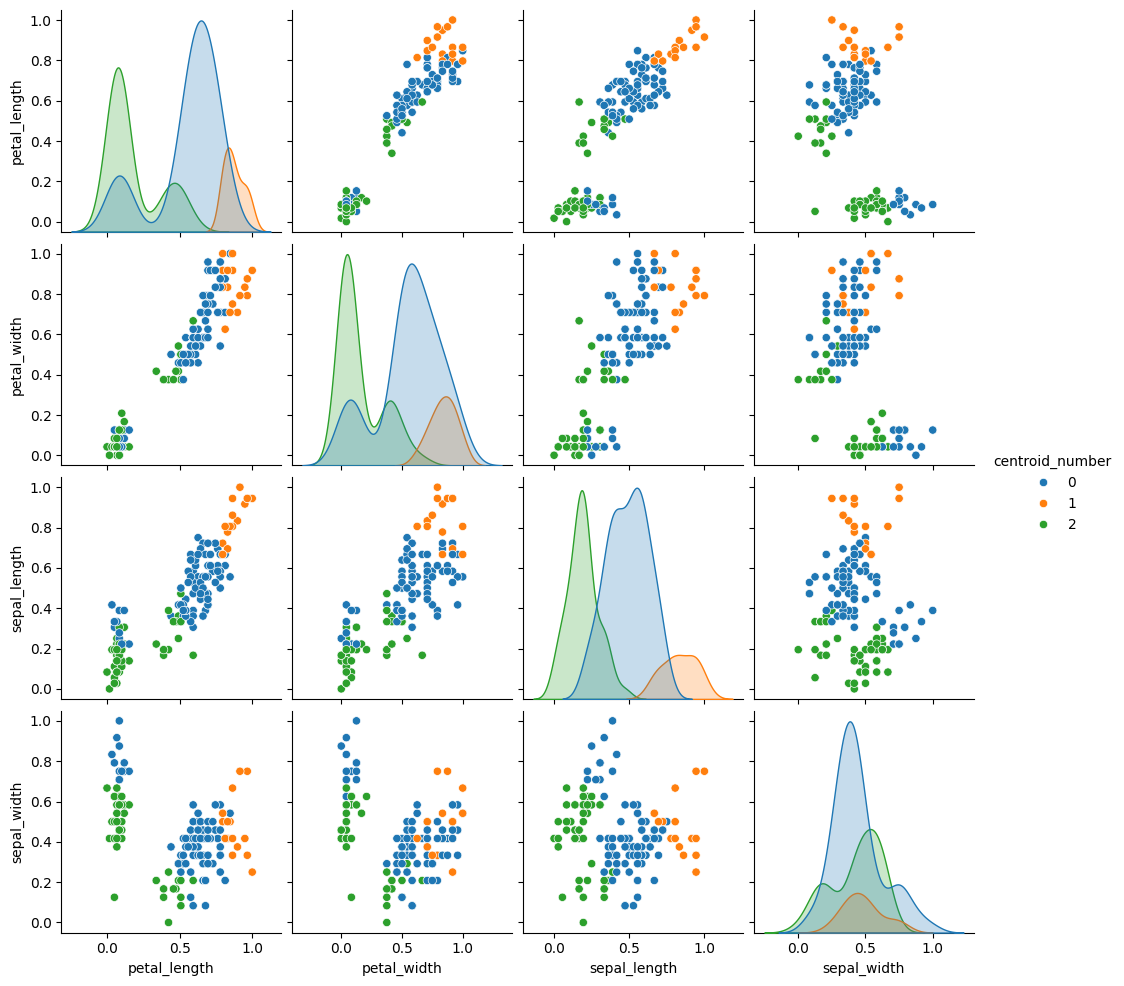

In [12]:
kmeans = K_Means(iris_no_species, 3)
kmeans.train(1000)
sns.pairplot(kmeans.get_data(), hue='centroid_number', palette=sns.color_palette("tab10"))
plt.show()

# Segmentacion de colores

In [25]:
def reducing_colors(route: str, max_iter: int = 20, k: int=1):
    image_dir = route
    img = Image.open(image_dir)
    new_img = Image.open(image_dir)
    img = img.convert('RGB')
    width, height = img.size
    pixel_map = img.load()
    pixel_list = []
    for w in range(width):
        for h in range(height):
            pixel_list.append(list(pixel_map[w, h]))

    pixel_df = pd.DataFrame(data={'rgb': pixel_list})
    pixel_df['1r'] = pixel_df['rgb'].apply(lambda c: c[0])
    pixel_df['2g'] = pixel_df['rgb'].apply(lambda c: c[1])
    pixel_df['3b'] = pixel_df['rgb'].apply(lambda c: c[2])
    pixel_df.drop(columns=['rgb'], inplace=True)
    pixel_df = pixel_df[sorted(pixel_df.columns)]

    kmeans = K_Means(pixel_df, k)
    kmeans.train(max_iter)
    res = kmeans.get_data_with_new_category()

    for w in range(width):
        for h in range(height):
            (r, g, b) = pixel_map[w, h]
            [new_r, new_g, new_b] = res[(res['1r']==r) & (res['2g']==g) & (res['3b']==b)]['centroid_value'].tolist()[0]
            new_img.putpixel((w, h), value=(new_r, new_g, new_b))
    new_img.save(f"{route}_k={k}_max_iter={max_iter}.png")

In [26]:
reducing_colors('img/pitufo.jpg', max_iter=30, k=15)

Convergence reached in 30 iterations


In [27]:
reducing_colors('img/pitufo.jpg', max_iter=30, k=20)

Convergence reached in 30 iterations


In [28]:
reducing_colors('img/pitufo.jpg', max_iter=30, k=30)

Convergence reached in 30 iterations
